<a href="https://colab.research.google.com/github/Krishna421808/Charts/blob/main/OfficeSuppliesTimeForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/content/sample_data/superstore.xlsx")
# There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.
OfficeSupplies = df.loc[df['Category'] == 'Office Supplies']

In [3]:
OfficeSupplies['Order Date'].min(), OfficeSupplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
OfficeSupplies.drop(cols, axis=1, inplace=True)
OfficeSupplies = OfficeSupplies.sort_values('Order Date')
OfficeSupplies.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
OfficeSupplies = OfficeSupplies.groupby('Order Date')['Sales'].sum().reset_index()

In [6]:
OfficeSupplies = OfficeSupplies.set_index('Order Date')
OfficeSupplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [7]:
# we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.
y = OfficeSupplies['Sales'].resample('MS').mean()

In [8]:
# Getting a quick info of the 2017 sales data 
y['2017':]

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

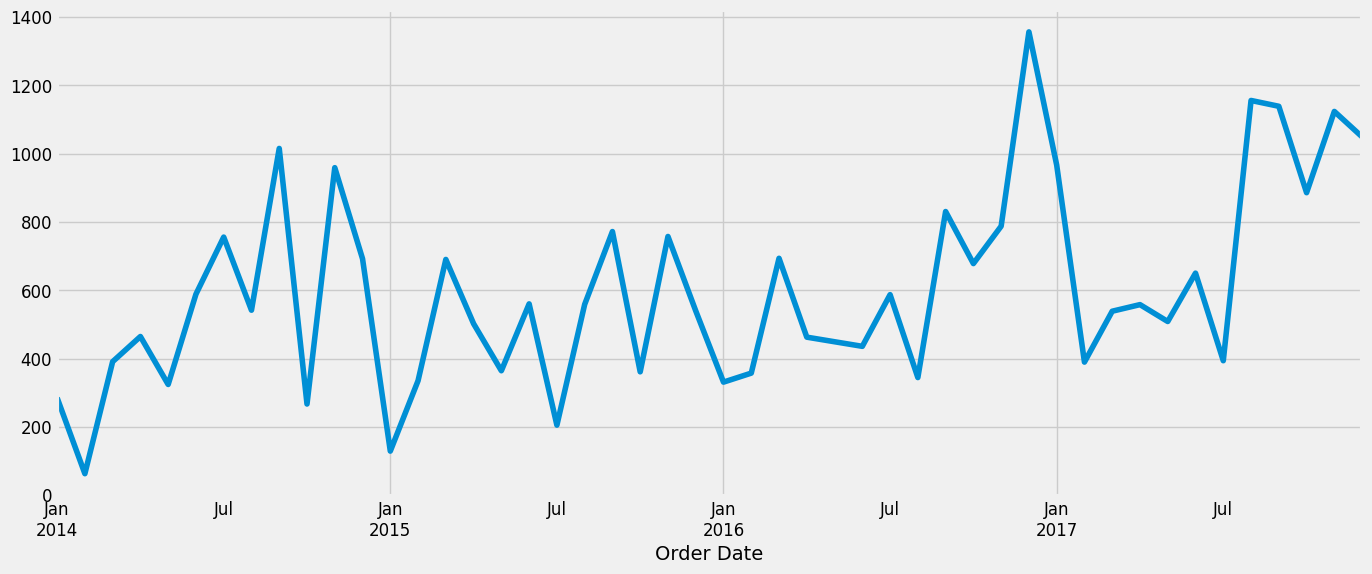

In [9]:
# OfficeSupllies sales time series data 
y.plot(figsize=(15, 6))
plt.show()

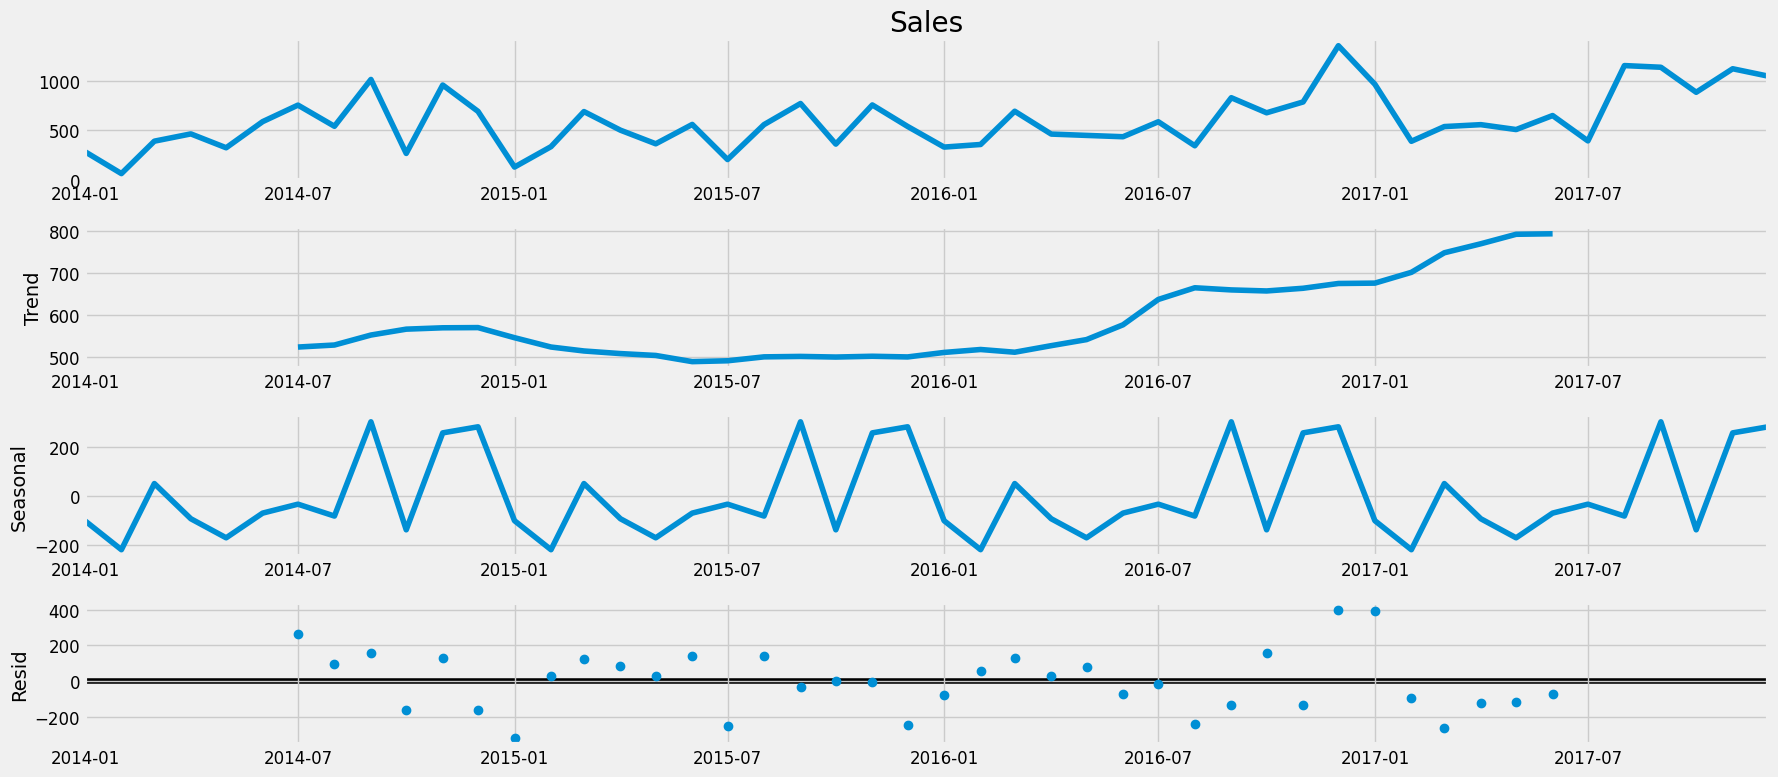

In [10]:
# We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Time Series Forecasting with Arima Model(Autoregressive Integrated Moving Average Model)

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
# This step is parameter Selection for our Office Supplies sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print('An exception occurred:', e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1739.704717630492
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.7335398741499
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.71014965105854
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936832


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1417.1397219505288
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335.907857335568
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292471


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2708.55338757161
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.76014158147797
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.86259572801384
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646585882


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2571.4678998827335
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.69220944601165
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.8450775243774
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572044948625


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1256.2277781870264
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:503.0840747554472
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:323.42010400940154
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.0109385290892
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1308.6777364048937
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.7148959418817
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:322.9595403092149
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:637.3530008828195
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2181.2124154539824


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:473.71539674554106
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:302.48088241060447
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:489.9419970027698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2366.3093158503166
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:330.70615130932487
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:303.769435838613
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:680.4032716562347


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1367.8304503426202
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:501.70312266723687
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:331.47111181403164
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:500.21905344214423


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1203.089057205997
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:331.07199732561276
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:332.9374884385181
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:651.1768264308498


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2555.6386188639344
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:488.4314196132822
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:317.77404794095486
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:489.254640043996


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2402.142960620503
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:331.7136802273558
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:318.34189985322723
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:658.0713305703065


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1208.4173509948905
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:494.90767973739406
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:321.10489100796883
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:482.80837530249676


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1287.8635157165188
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:321.2325469883704
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:321.3921769326804
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:638.7962401173608


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:441.12507384526776
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:475.7138851956531
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:304.2342988745784
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:478.6987301743507


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1866.1059609614917
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:318.2066479084322
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:305.34851567600856


In [13]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1720      0.229      0.750      0.453      -0.278       0.622
ma.L1         -1.1313      0.243     -4.646      0.000      -1.608      -0.654
ar.S.L12      -0.5448      0.238     -2.292      0.022      -1.011      -0.079
sigma2      5.009e+04   2.52e+04      1.989      0.047     722.110    9.95e+04


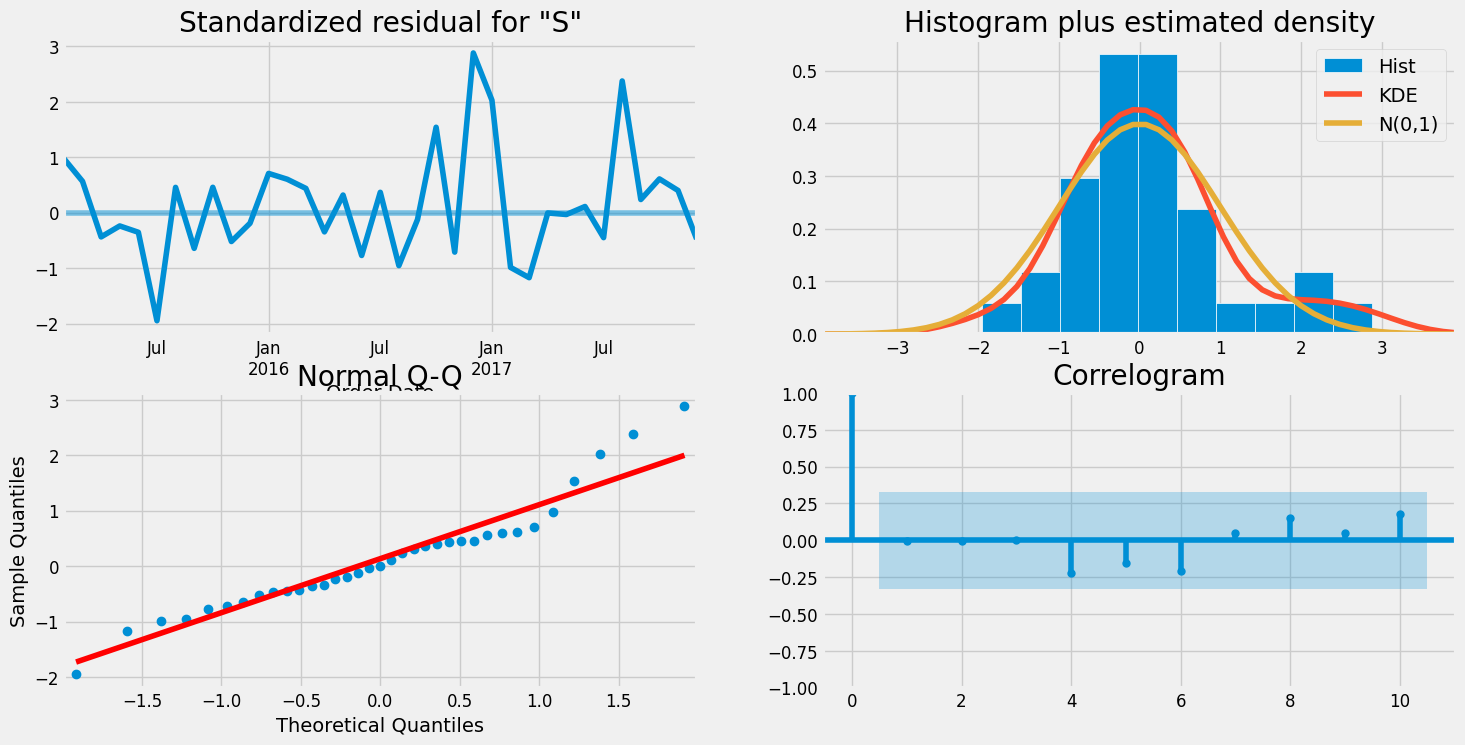

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

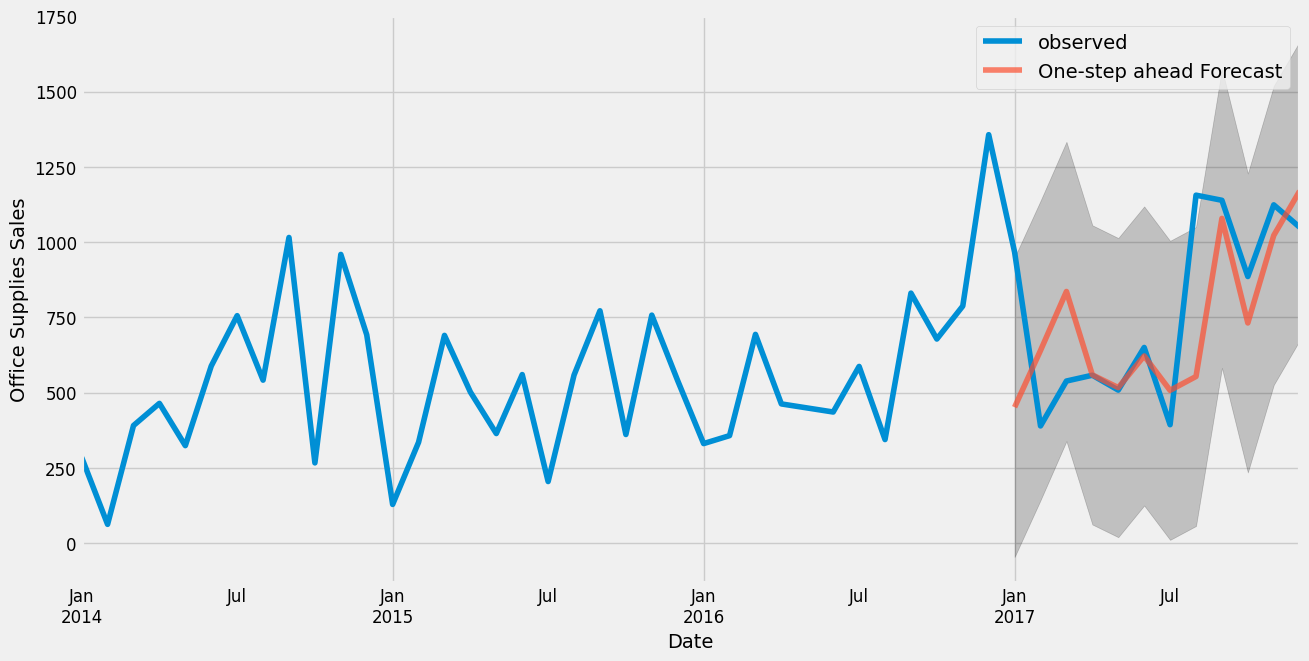

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70427.04


In [18]:
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 265.38


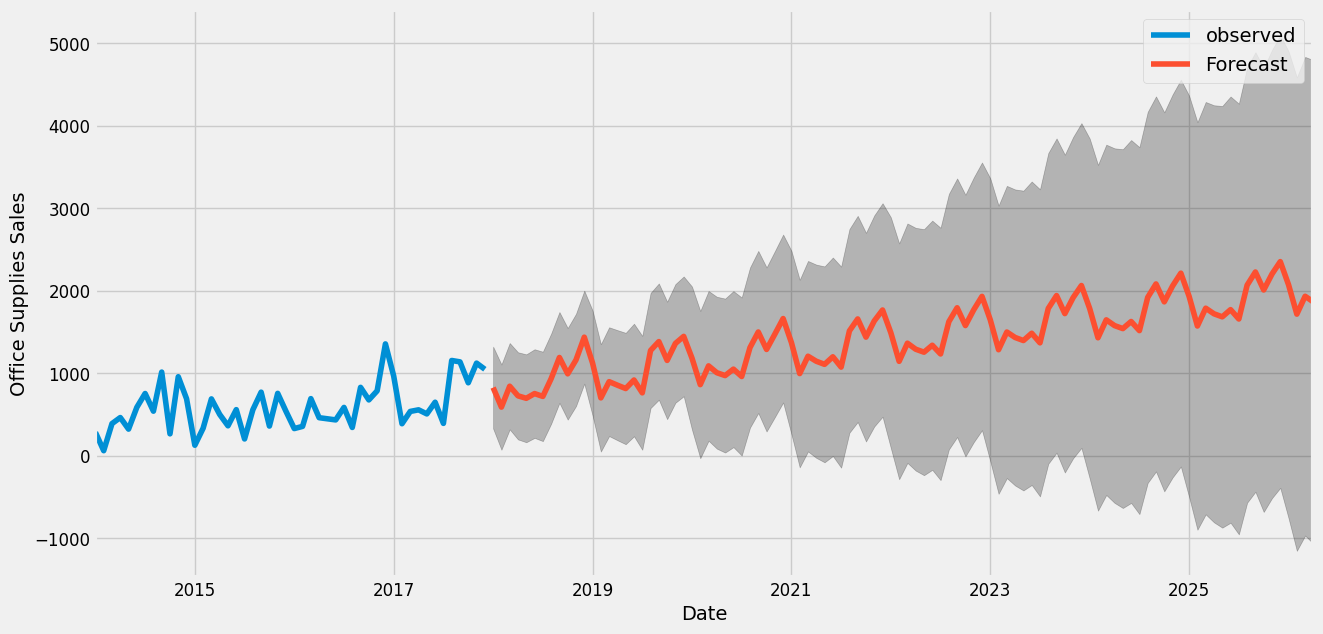

In [19]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()